# Beautiful Photometry

* [GitHub]()

A set of tools to compute lighting photometric data and generate beautiful graphics. This is a work in progress.

It is based on the Colour Science library ([GitHub](https://github.com/colour-science/colour)) ([Docs](https://www.colour-science.org/)). 

In [1]:
# Setup
%matplotlib inline

# Colour Science Library
import colour  
from colour.plotting import *  # plotting tools 

/usr/local/lib/python3.7/site-packages/colour/utilities/verbose.py:141: ColourWarning: "x" independent variable is not uniform, unpredictable results may occur!
  warn(*args, **kwargs)


In [10]:
from spectrum import import_spd

test_spd = import_spd('test_spd.csv', 'test')

cri = colour.colour_rendering_index(test_spd)

print('CRI:',cri)




CRI: 96.85989602172343


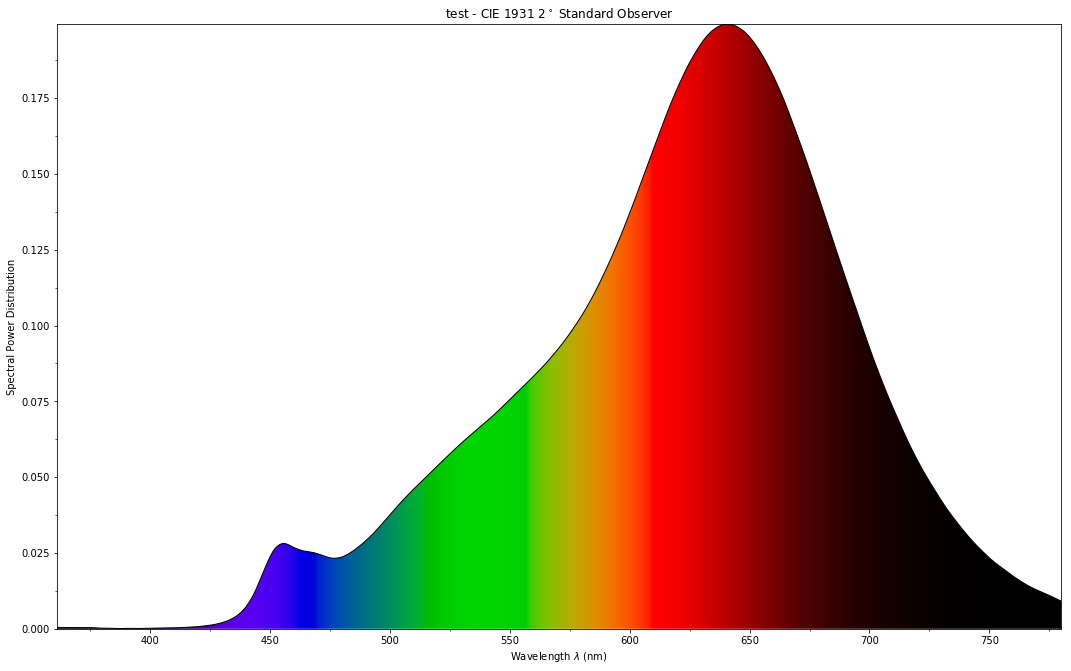

In [9]:
single_spd_plot(test_spd)

/usr/local/lib/python3.7/site-packages/colour/models/rgb/transfer_functions/srgb.py:78: RuntimeWarning: invalid value encountered in power
  np.where(L <= 0.0031308, L * 12.92, 1.055 * (L ** (1 / 2.4)) - 0.055))
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


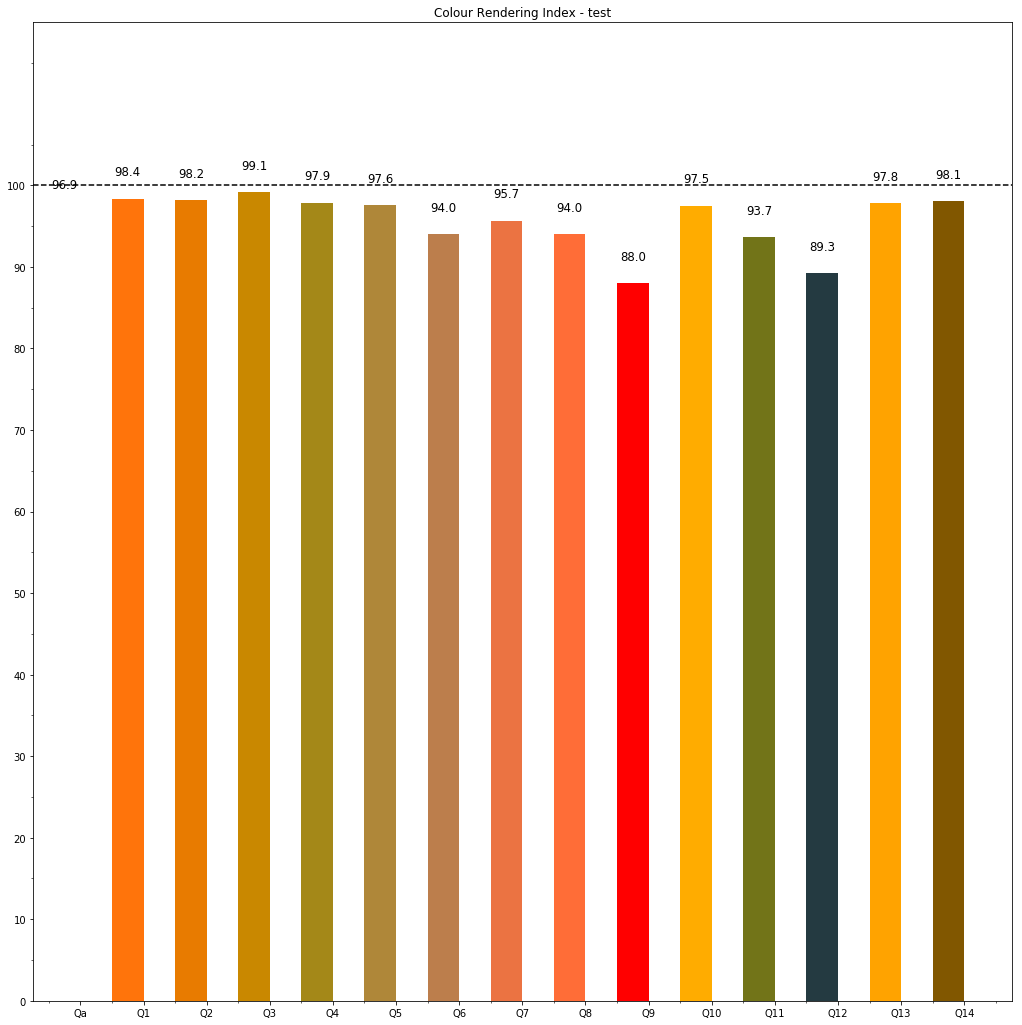

In [11]:
single_spd_colour_rendering_index_bars_plot(test_spd)